### Создать ноутбук, в котором выполнить решение вычислительной задачи (например, задачи из области физики, экономики, математики, статистики и т. д.) требующей построения круговой диаграммы, условие которой предварительно необходимо согласовать с преподавателем.

Была выбрана задача по анализу датасета страховок.

Подключение не обходимых библиотек и открытие файла с данными:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('insurance.csv')

Вывод начала датасета:

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Выбираем столбцы, в которых содержится информация о поле человека и том, курит ли он:

In [3]:
df = df[['sex', 'smoker']]
df.describe()

,sex,smoker
count,1338,1338
unique,2,2
top,male,no
freq,676,1064


Выбираем из данных курящих и некурящих мужчин и женщин:

In [4]:
m_y = df.loc[(df.sex == 'male') & (df.smoker == 'yes')].value_counts()
m_n = df.loc[(df.sex == 'male') & (df.smoker == 'no')].value_counts()
f_y = df.loc[(df.sex == 'female') & (df.smoker == 'yes')].value_counts()
f_n = df.loc[(df.sex == 'female') & (df.smoker == 'no')].value_counts()

keys_m_y = list(dict(m_y).keys())
values_m_y = list(dict(m_y).values())[0]

keys_m_n = list(dict(m_n).keys())
values_m_n = list(dict(m_n).values())[0]

keys_f_y = list(dict(f_y).keys())
values_f_y = list(dict(f_y).values())[0]

keys_f_n = list(dict(f_n).keys())
values_f_n = list(dict(f_n).values())[0]

keys_m_y = str(keys_m_y[0][0]) + "_" + str(keys_m_y[0][1])
keys_m_n = str(keys_m_n[0][0]) + "_" + str(keys_m_n[0][1])
keys_f_y = str(keys_f_y[0][0]) + "_" + str(keys_f_y[0][1])
keys_f_n = str(keys_f_n[0][0]) + "_" + str(keys_f_n[0][1])

groups = [keys_m_y, keys_m_n, keys_f_y, keys_f_n]
counts = [values_m_y, values_m_n, values_f_y, values_f_n]

print(groups)
print(counts)

['male_yes', 'male_no', 'female_yes', 'female_no']
[159, 517, 115, 547]


Выводим столбчатые диаграммы:

<BarContainer object of 4 artists>

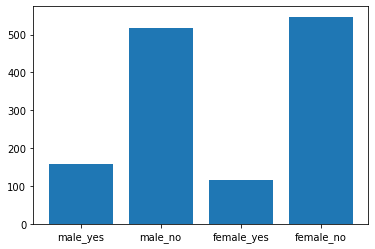

In [5]:
plt.bar(groups, counts)

Выбираем только курящих мужчин и женщин и строим диаграммы:

<BarContainer object of 2 artists>

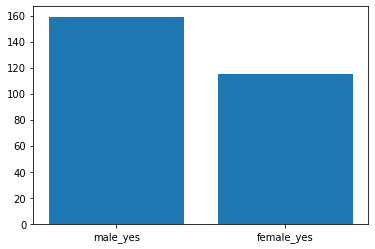

In [6]:
smokers_groups = list(groups[0::2])
smokers_counts = list(counts[0::2])
plt.bar(smokers_groups, smokers_counts)

Из диаграмм видно, что количество курящих мужчин больше

Выбираем только некурящих мужчин и женщин и строим диаграммы:

<BarContainer object of 2 artists>

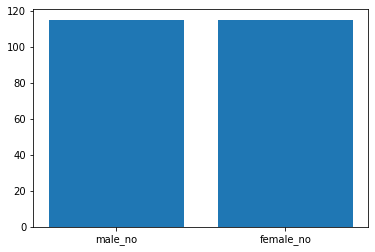

In [7]:
no_smokers_groups = list(groups[1::2])
no_smokers_counts = list(counts[2::2])
plt.bar(no_smokers_groups, no_smokers_counts)

Из диаграмм видно, что количество некурящих мужчин и женщин одинаково